# [TalkingData AdTracking Fraud Detection Challenge - Kaggle](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection)

* ip: ip address of click.
* app: app id for marketing.
* device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
* os: os version id of user mobile phone
* channel: channel id of mobile ad publisher
* click_time: timestamp of click (UTC)
* attributed_time: if user download the app for after clicking an ad, this is the time of the app download
* is_attributed: the target that is to be predicted, indicating the app was downloaded

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
sample = pd.read_csv('data/train_sample.csv', parse_dates=['click_time'])
# %time train = pd.read_csv('data/train.csv', parse_dates=['click_time'])
# %time test = pd.read_csv('data/test.csv', parse_dates=['click_time'])
print(sample.shape)
# print(train.shape)
# print(test.shape)

(100000, 8)


In [3]:
import os
for f in os.listdir('./data'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('./data/' + f) / 1000000, 2)) + 'MB')

test.csv                      863.27MB
train_sample.csv              4.08MB
train.csv                     7537.65MB


In [4]:
sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [5]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


In [6]:
sample.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [7]:
sample.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [8]:
sample["year"] = sample["click_time"].dt.year
sample["month"] = sample["click_time"].dt.month
sample["day"] = sample["click_time"].dt.day
sample["hour"] = sample["click_time"].dt.hour
sample["minute"] = sample["click_time"].dt.minute
sample["second"] = sample["click_time"].dt.second

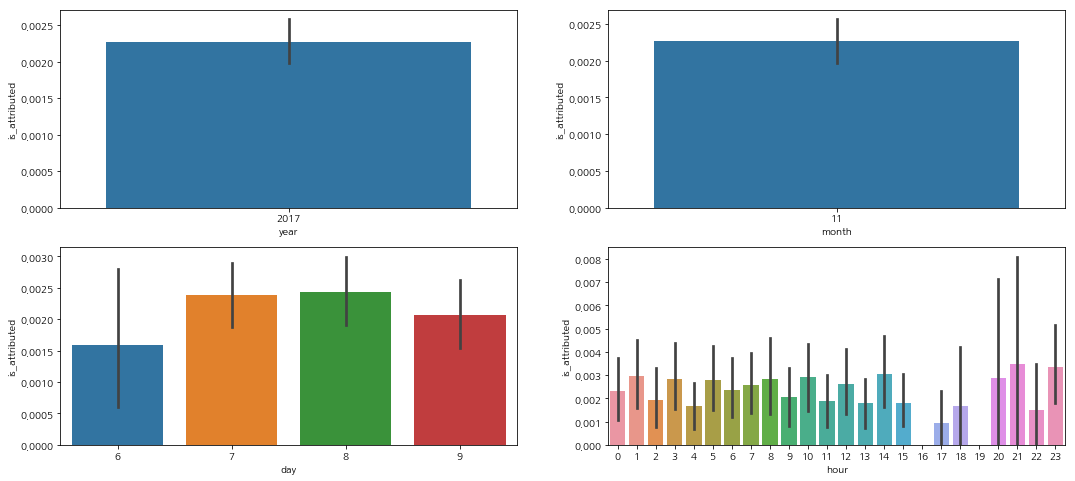

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18,8)

sns.barplot(data=sample, x='year', y='is_attributed', ax=axes[0][0])
sns.barplot(data=sample, x='month', y='is_attributed', ax=axes[0][1])
sns.barplot(data=sample, x='day', y='is_attributed', ax=axes[1][0])
sns.barplot(data=sample, x='hour', y='is_attributed', ax=axes[1][1])

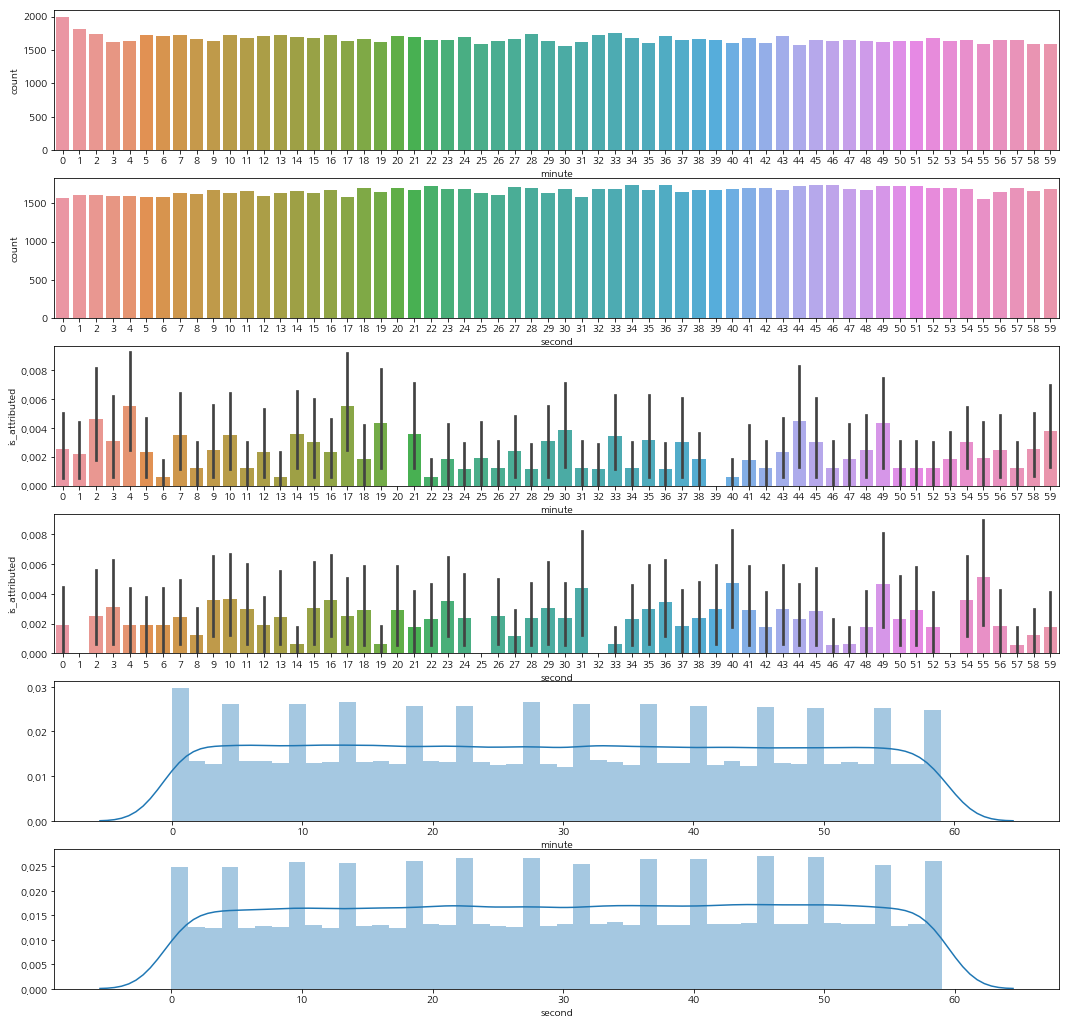

In [10]:
fig, axes = plt.subplots(nrows=6)
fig.set_size_inches(18,18)
sns.countplot(sample['minute'], ax=axes[0])
sns.countplot(sample['second'], ax=axes[1])
sns.barplot(data=sample, x='minute', y='is_attributed', ax=axes[2])
sns.barplot(data=sample, x='second', y='is_attributed', ax=axes[3])
sns.distplot(sample['minute'], ax=axes[4])
sns.distplot(sample['second'], ax=axes[5])

In [11]:
sample.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

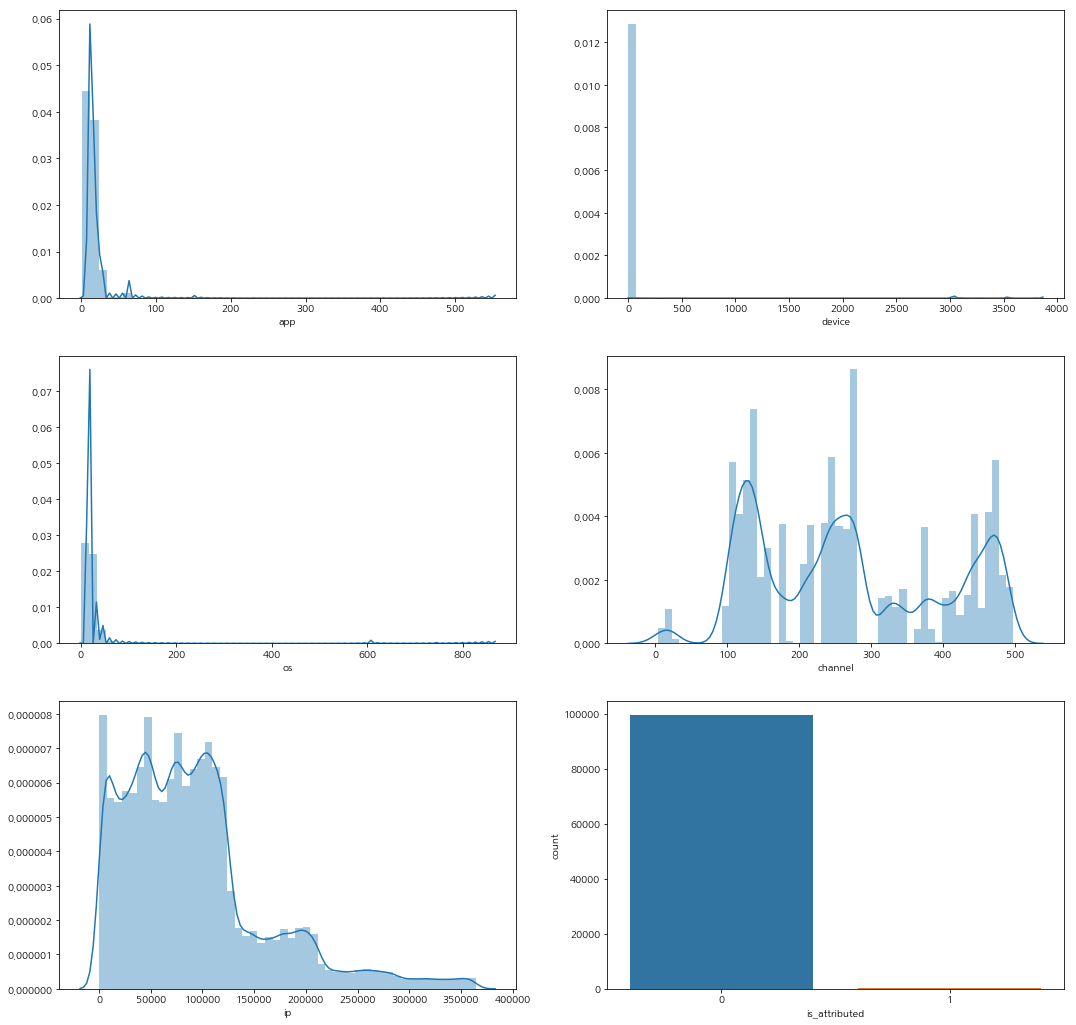

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(18,18)

sns.distplot(sample['app'], ax=axes[0][0])
sns.distplot(sample['device'], ax=axes[0][1])
sns.distplot(sample['os'], ax=axes[1][0])
sns.distplot(sample['channel'], ax=axes[1][1])
sns.distplot(sample['ip'], ax=axes[2][0])
sns.countplot(sample['is_attributed'], ax=axes[2][1])

In [13]:
# 1, 2, 0번 순으로 디바이스가 많다.
# 이 데이터에는 100개의 디바이스가 있다.
device = sample.device.value_counts()
print(device.shape)
device.head(10)

(100,)


1       94338
2        4345
0         541
3032      371
3543      151
3866       93
59         12
6           8
16          7
5           7
Name: device, dtype: int64

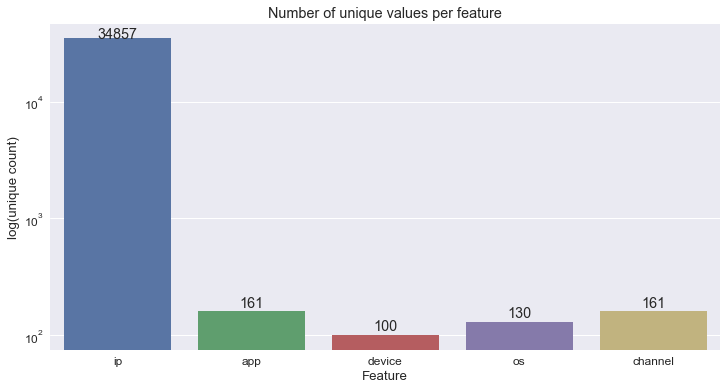

In [14]:
# 참고 : https://www.kaggle.com/anokas/talkingdata-adtracking-eda
plt.figure(figsize=(12, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(sample[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center")

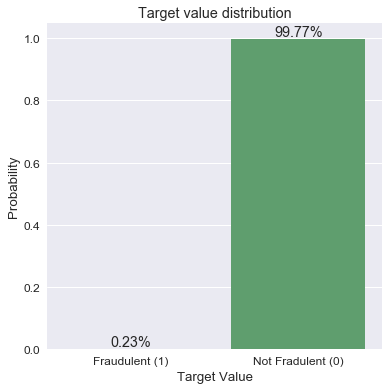

In [15]:
# 참고 : https://www.kaggle.com/anokas/talkingdata-adtracking-eda
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
mean = (sample.is_attributed.values == 1).mean()
ax = sns.barplot(['Fraudulent (1)', 'Not Fradulent (0)'], [mean, 1-mean])
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center") 

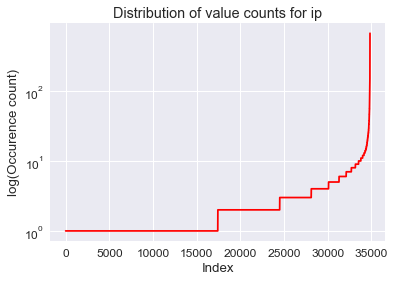

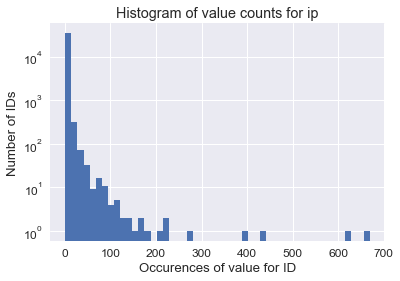

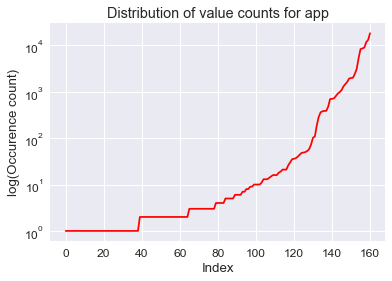

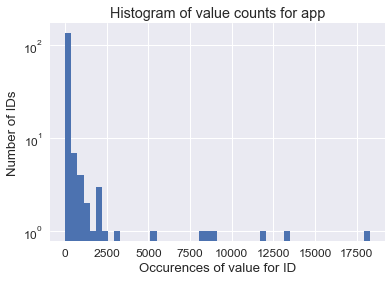

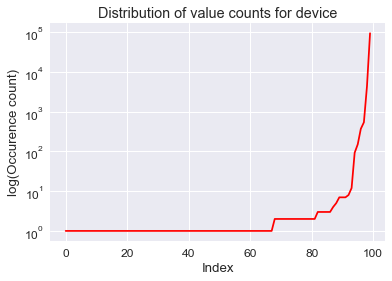

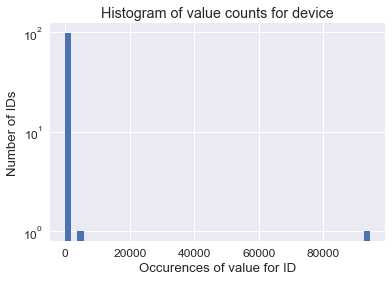

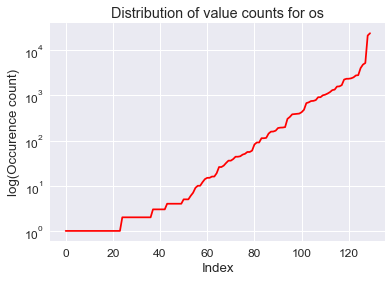

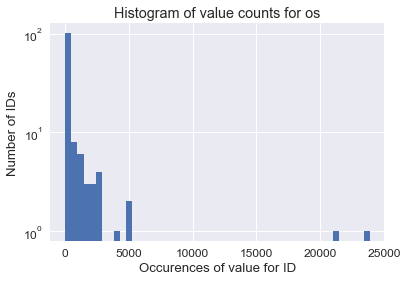

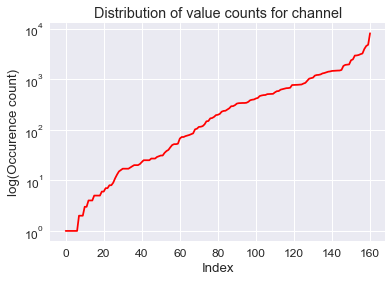

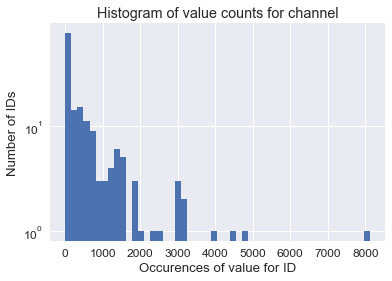

In [16]:
# https://www.kaggle.com/anokas/talkingdata-adtracking-eda
for col, uniq in zip(cols, uniques):
    counts = sample[col].value_counts()

    sorted_counts = np.sort(counts.values)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(sorted_counts, color='red')
    ax.set_yscale('log')
    plt.title('Distribution of value counts for {}'.format(col))
    plt.ylabel('log(Occurence count)')
    plt.xlabel('Index')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(sorted_counts, bins=50)
    ax.set_yscale('log', nonposy='clip')
    plt.title('Histogram of value counts for {}'.format(col))
    plt.ylabel('Number of IDs')
    plt.xlabel('Occurences of value for ID')
    plt.show()
    
    max_count = np.max(counts)
    min_count = np.min(counts)
    gt = [10, 100, 1000]
    prop_gt = []
    for value in gt:
        prop_gt.append(round((counts > value).mean()*100, 2))

#### 여러개의 ips로 다운로드 되었는지 확인 

ip가 실제로 무엇을 인코딩 한 것인지가 중요하다. ip가 사용자마다 고유한지는 명확하지 않다.ip가 너무 많이 반복된다면 봇일까? 반복되는 ips를 변환해 본다.

In [17]:
temp = sample['ip'].value_counts().reset_index(name='counts')
temp.columns = ['ip', 'counts']
temp[:10]

,ip,counts
0,5348,669
1,5314,616
2,73487,439
3,73516,399
4,53454,280
5,114276,219
6,26995,218
7,95766,205
8,17149,186
9,100275,173


In [18]:
sample = sample.merge(temp, on='ip', how='left')
sample.head(3)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,month,day,hour,minute,second,counts
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017,11,7,9,30,38,8
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017,11,7,13,40,27,149
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017,11,7,18,5,24,2


In [19]:
sample[sample['is_attributed']==1].sort_values('counts', ascending=False)[:10]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,month,day,hour,minute,second,counts
11680,5348,29,1,19,343,2017-11-07 23:07:12,2017-11-07 23:07:41,1,2017,11,7,23,7,12,669
15821,5348,19,0,29,213,2017-11-07 14:17:49,2017-11-07 14:17:52,1,2017,11,7,14,17,49,669
30073,5348,19,40,24,213,2017-11-09 10:47:39,2017-11-09 10:47:54,1,2017,11,9,10,47,39,669
88104,5314,83,0,21,171,2017-11-06 23:07:45,2017-11-06 23:16:28,1,2017,11,6,23,7,45,616
47464,5314,18,1,19,107,2017-11-08 12:23:04,2017-11-08 12:23:06,1,2017,11,8,12,23,4,616
78399,5314,10,1,1,113,2017-11-07 23:21:15,2017-11-08 00:01:03,1,2017,11,7,23,21,15,616
64677,111025,10,1,19,377,2017-11-07 13:45:35,2017-11-07 13:46:28,1,2017,11,7,13,45,35,137
22433,44067,19,0,38,213,2017-11-09 11:41:11,2017-11-09 11:42:06,1,2017,11,9,11,41,11,70
80075,5729,19,0,0,347,2017-11-07 07:33:23,2017-11-07 07:35:47,1,2017,11,7,7,33,23,42
9277,118252,19,957,59,213,2017-11-07 13:19:35,2017-11-07 13:22:10,1,2017,11,7,13,19,35,41


In [20]:
sample[sample['is_attributed']==1].ip.describe()

count       227.000000
mean     171715.154185
std      106667.455804
min        2948.000000
25%       81155.000000
50%      179080.000000
75%      256782.500000
max      358438.000000
Name: ip, dtype: float64

In [21]:
sample['is_attributed'] = sample['is_attributed'].astype(int)

### 일반적인 IP 300개의 전환율

In [22]:
proportion = sample[['ip', 'is_attributed']] \
            .groupby('ip', as_index=False) \
            .mean() \
            .sort_values('is_attributed', ascending=False)
proportion[:3]            

,ip,is_attributed
26086,171892,1.0
34298,344113,1.0
16838,96637,1.0


In [23]:
counts = sample[['ip', 'is_attributed']] \
        .groupby('ip', as_index=False) \
        .count() \
        .sort_values('is_attributed', ascending=False)
counts[:3]

,ip,is_attributed
926,5348,669
918,5314,616
12833,73487,439


In [24]:
merge = counts.merge(proportion, on='ip', how='left')
merge.columns = ['ip', 'click_count', 'prop_downloaded']

Text(0,0.5,'Proportion Downloaded')

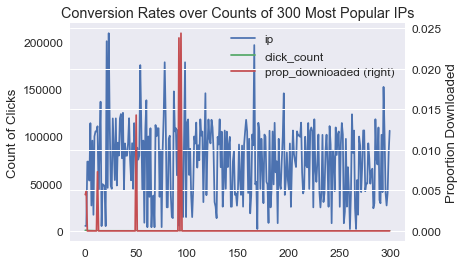

In [25]:
ax = merge[:300].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 300 Most Popular IPs')
ax.set(ylabel='Count of Clicks')
plt.ylabel('Proportion Downloaded')

In [26]:
merge[:20]

,ip,click_count,prop_downloaded
0,5348,669,0.004484
1,5314,616,0.004870
2,73487,439,0.000000
3,73516,399,0.000000
4,53454,280,0.000000
5,114276,219,0.000000
6,26995,218,0.000000
7,95766,205,0.000000
8,17149,186,0.000000
9,100275,173,0.000000


전환은 일관성이 없으며 IP가 얼마나 일관성있는지는 관련이 없는 것처럼 보인다.

#### 앱별 전환율

In [27]:
# 인기있는 100개의 앱에 대한 클릭 수
proportion = sample[['app', 'is_attributed']] \
            .groupby('app', as_index=False) \
            .mean() \
            .sort_values('is_attributed', ascending=False)
print(proportion.shape)
proportion[:10]

(161, 2)


,app,is_attributed
98,115,1.000000
99,116,1.000000
85,96,1.000000
112,145,1.000000
64,71,1.000000
138,261,1.000000
94,108,0.666667
33,34,0.666667
34,35,0.551020
65,72,0.375000


In [28]:
counts = sample[['app', 'is_attributed']] \
        .groupby('app', as_index=False) \
        .count() \
        .sort_values('is_attributed', ascending=False)
print(counts.shape)
counts[:10]

(161, 2)


,app,is_attributed
2,3,18279
11,12,13198
1,2,11737
8,9,8992
14,15,8595
17,18,8315
13,14,5359
0,1,3135
12,13,2422
7,8,2004


In [29]:
merge = counts.merge(proportion, on='app', how='left')
merge.columns = ['app', 'click_count', 'prop_downloaded']

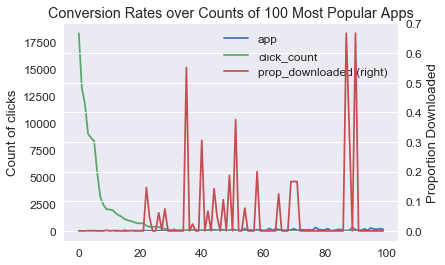

인기있는 앱의 전환율


,app,click_count,prop_downloaded
0,3,18279,0.000219
1,12,13198,0.000076
2,2,11737,0.000000
3,9,8992,0.000890
4,15,8595,0.000233
5,18,8315,0.000601
6,14,5359,0.000000
7,1,3135,0.000000
8,13,2422,0.000000
9,8,2004,0.001996


In [30]:
ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('인기있는 앱의 전환율')
merge[:20]